## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model

import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Load Datasets

In [2]:
train_df = pd.read_csv("train_data_evaluation_part_2.csv")
print(train_df.shape)
train_df.head()

(82580, 30)


,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df = pd.read_csv("test_data_evaluation_part2.csv")
print(test_df.shape)
test_df.head()

(1000, 30)


,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,82592,82593,SGP,15.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,82593,82594,SGP,12.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82594,82595,PRT,NaN,11,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


## 3. Data Pre-processing

### 3.1. Drop the unnamed column

In [4]:
train_df.drop(columns = {'Unnamed: 0'}, inplace = True)
test_df.drop(columns = {'Unnamed: 0'}, inplace = True)

### 3.2. Missing Values Removal

In [5]:
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())

ID                         0
Nationality                0
Age                     3746
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

ID                       0
Nationality              0
Age                     33
DaysSinceCreation        0
AverageLeadTime          0
LodgingRev

In [6]:
train_df = train_df[train_df.Age > 0]
test_df = test_df[test_df.Age > 0]

### 3.3. Removing Unwanted Values

In [7]:
train_df = train_df[train_df.AverageLeadTime >= 0]
test_df = test_df[test_df.AverageLeadTime >= 0]

In [8]:
train_df = train_df[(train_df['BookingsCanceled'] == 0) | (train_df['BookingsCanceled'] == 1)]
train_df = train_df[(train_df['BookingsNoShowed'] == 0) | (train_df['BookingsNoShowed'] == 1)]
train_df = train_df[(train_df['BookingsCheckedIn'] == 0) | (train_df['BookingsCheckedIn'] == 1)]

test_df = test_df[(test_df['BookingsCanceled'] == 0) | (test_df['BookingsCanceled'] == 1)]
test_df = test_df[(test_df['BookingsNoShowed'] == 0) | (test_df['BookingsNoShowed'] == 1)]
test_df = test_df[(test_df['BookingsCheckedIn'] == 0) | (test_df['BookingsCheckedIn'] == 1)]

## 4. Feature Extraction

### 4.1. Encoding Categorical Features

In [9]:
column_name = ['DistributionChannel', 'MarketSegment']
one_train_hot = pd.get_dummies(train_df[column_name])
one_train_hot.head()

,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
2,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0,0,0,1,0
6,0,0,0,1,0,0,0,0,0,1,0


In [10]:
updated_train_df = pd.concat([train_df, one_train_hot], axis=1)
updated_train_df = updated_train_df.drop(['ID', 'Nationality', 'DistributionChannel', 'MarketSegment'], axis=1)
updated_train_df.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
2,31.0,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,60.0,1095,93,240.0,60.0,0,0,1,10,5,...,0,0,1,0,0,0,0,0,0,1
4,51.0,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,54.0,1095,58,230.0,24.0,0,0,1,4,2,...,0,0,1,0,0,0,0,0,1,0
6,49.0,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [11]:
one_test_hot = pd.get_dummies(test_df[column_name])
one_test_hot.head()

,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,0
5,1,0,0,0,0,0,1,0,0,0


In [12]:
updated_test_df = pd.concat([test_df, one_test_hot], axis=1)
updated_test_df = updated_test_df.drop(['ID', 'Nationality', 'DistributionChannel', 'MarketSegment'], axis=1)
updated_test_df.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,47.0,11,0,0.00,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,16.0,11,130,483.48,155.1,0,0,1,15,5,...,0,0,0,1,0,0,0,0,1,0
2,15.0,11,0,0.00,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,12.0,11,0,0.00,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,42.0,11,1,59.00,7.0,0,0,1,1,1,...,1,0,0,0,0,0,1,0,0,0


### 4.2. Training & Test Feature Selection

In [13]:
train_corr = updated_train_df.corr()
train_corr

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
Age,1.000000,0.126294,0.252514,0.049349,0.120316,0.005552,0.004436,0.196649,0.109704,0.139158,...,-0.068592,-0.011641,0.060839,0.014962,-0.016349,-0.003704,-0.067775,0.164985,-0.121786,0.091894
DaysSinceCreation,0.126294,1.000000,0.137667,0.099981,0.170765,0.002912,0.005228,0.414066,0.249888,0.261139,...,-0.061326,-0.019302,0.045074,-0.002259,-0.008362,-0.010577,-0.062046,0.010666,-0.018257,0.083208
AverageLeadTime,0.252514,0.137667,1.000000,0.241086,0.264373,-0.008744,-0.004813,0.428345,0.364394,0.378330,...,-0.105129,-0.040642,0.128183,-0.029923,-0.034115,-0.073355,-0.100054,0.125541,-0.088121,0.149355
LodgingRevenue,0.049349,0.099981,0.241086,1.000000,0.542553,-0.001927,-0.001475,0.479432,0.666766,0.697374,...,-0.003874,-0.005696,0.011534,0.008018,-0.053677,-0.014395,0.004956,-0.022256,0.076112,-0.076939
OtherRevenue,0.120316,0.170765,0.264373,0.542553,1.000000,0.000658,-0.003905,0.352977,0.548941,0.513494,...,-0.007390,-0.026167,0.021711,-0.002980,-0.032245,-0.033893,-0.001677,-0.009981,0.000886,0.030045
BookingsCanceled,0.005552,0.002912,-0.008744,-0.001927,0.000658,1.000000,0.072005,0.009877,-0.003390,0.001148,...,0.005625,-0.001388,-0.027118,0.083795,0.009565,0.043562,0.005951,-0.001628,-0.019375,-0.007145
BookingsNoShowed,0.004436,0.005228,-0.004813,-0.001475,-0.003905,0.072005,1.000000,0.005702,-0.001485,0.000234,...,0.003247,-0.000801,-0.015655,-0.000442,-0.000696,0.042904,-0.000287,-0.003620,-0.012044,0.003171
BookingsCheckedIn,0.196649,0.414066,0.428345,0.479432,0.352977,0.009877,0.005702,1.000000,0.581921,0.662070,...,-0.053814,0.036868,0.021968,0.021590,0.000177,0.046257,-0.057225,0.043439,-0.026672,0.032670
PersonsNights,0.109704,0.249888,0.364394,0.666766,0.548941,-0.003390,-0.001485,0.581921,1.000000,0.899746,...,-0.041458,-0.042748,0.075020,-0.009402,-0.028970,-0.065217,-0.036879,-0.086120,0.075513,0.041054
RoomNights,0.139158,0.261139,0.378330,0.697374,0.513494,0.001148,0.000234,0.662070,0.899746,1.000000,...,-0.069229,-0.013748,0.072331,0.027736,-0.028338,-0.021032,-0.065110,-0.004294,0.009395,0.065126


In [14]:
cor_target = abs(train_corr["BookingsCheckedIn"])

relevant_train_features = cor_target[cor_target>0.10]
relevant_train_features

Age                   0.196649
DaysSinceCreation     0.414066
AverageLeadTime       0.428345
LodgingRevenue        0.479432
OtherRevenue          0.352977
BookingsCheckedIn     1.000000
PersonsNights         0.581921
RoomNights            0.662070
DaysSinceLastStay     0.654019
DaysSinceFirstStay    0.654019
Name: BookingsCheckedIn, dtype: float64

In [15]:
final_train_df = train_df[['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
                           'OtherRevenue', 'PersonsNights', 'RoomNights',
                           'DaysSinceLastStay', 'DaysSinceFirstStay', 'BookingsCheckedIn']]
final_train_df["Age"] = final_train_df["Age"].astype(int)
final_train_df["LodgingRevenue"] = final_train_df["Age"].astype(int)
final_train_df["OtherRevenue"] = final_train_df["Age"].astype(int)
final_train_df.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,BookingsCheckedIn
2,31,1095,0,31,31,0,0,-1,-1,0
3,60,1095,93,60,60,10,5,1100,1100,1
4,51,1095,0,51,51,0,0,-1,-1,0
5,54,1095,58,54,54,4,2,1097,1097,1
6,49,1095,0,49,49,0,0,-1,-1,0


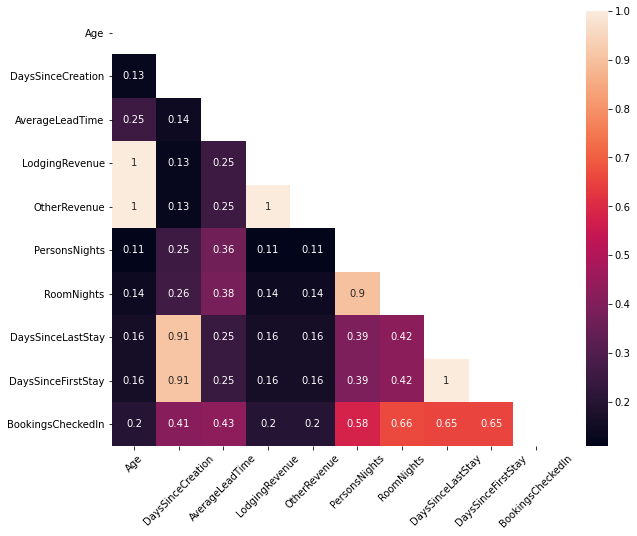

In [16]:
final_train_corr = final_train_df.corr()
mask = np.triu(np.ones_like(final_train_corr, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(final_train_corr, annot=True, mask = mask)
plt.xticks(rotation=45)
plt.show()

In [17]:
final_test_df = test_df[['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
                         'OtherRevenue', 'PersonsNights', 'RoomNights',
                         'DaysSinceLastStay', 'DaysSinceFirstStay']]
final_train_df["Age"] = final_train_df["Age"].astype(int)
final_train_df["LodgingRevenue"] = final_train_df["Age"].astype(int)
final_train_df["OtherRevenue"] = final_train_df["Age"].astype(int)
final_test_df.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay
0,47.0,11,0,0.00,0.0,0,0,-1,-1
1,16.0,11,130,483.48,155.1,15,5,16,16
2,15.0,11,0,0.00,0.0,0,0,-1,-1
3,12.0,11,0,0.00,0.0,0,0,-1,-1
5,42.0,11,1,59.00,7.0,1,1,12,12


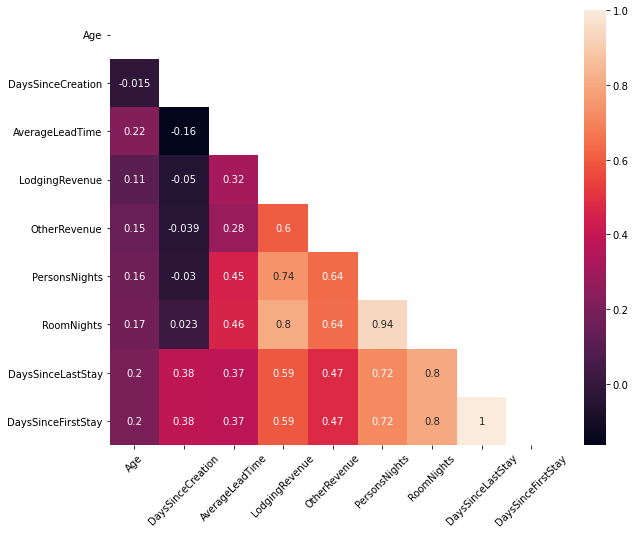

In [18]:
final_test_corr = final_test_df.corr()
mask = np.triu(np.ones_like(final_test_corr, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(final_test_corr, annot=True, mask = mask)
plt.xticks(rotation=45)
plt.show()

## 5. Predictive Analysis [Classification Models]

### 5.1. Train-Val-Test Split

In [19]:
X = final_train_df.drop(['BookingsCheckedIn'], axis=1)
y = final_train_df['BookingsCheckedIn']

In [20]:
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=10)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(54194, 9) (23227, 9) (54194,) (23227,)


In [22]:
X_test = final_test_df
print(X_test.shape)

(959, 9)


### 5.2. Classification Models

#### 5.2.1 Deep Sequential Model

In [23]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=9))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,913
Trainable params: 6,913
Non-trainabl

2022-08-06 00:38:53.667785: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=100)

Epoch 1/5
542/542 [==============================] - 3s 4ms/step - loss: 0.0400 - accuracy: 0.9886 - val_loss: 4.5026e-04 - val_accuracy: 1.0000
Epoch 2/5
542/542 [==============================] - 2s 3ms/step - loss: 2.7285e-04 - accuracy: 1.0000 - val_loss: 8.2431e-05 - val_accuracy: 1.0000
Epoch 3/5
542/542 [==============================] - 2s 3ms/step - loss: 1.0607e-04 - accuracy: 1.0000 - val_loss: 2.4293e-05 - val_accuracy: 1.0000
Epoch 4/5
542/542 [==============================] - 2s 4ms/step - loss: 2.5228e-04 - accuracy: 0.9999 - val_loss: 1.4280e-04 - val_accuracy: 1.0000
Epoch 5/5
542/542 [==============================] - 2s 4ms/step - loss: 2.7598e-04 - accuracy: 0.9999 - val_loss: 1.1702e-04 - val_accuracy: 0.9999


[]

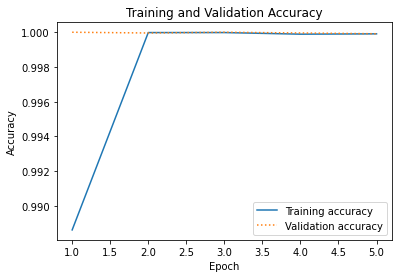

In [25]:
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [26]:
scores = model.evaluate(X_val, y_val, verbose=0)
print("Validation %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Validation accuracy: 99.99%


In [27]:
model.save("model.h5")

In [28]:
pickle.dump(model, open("model.pkl", "wb"))

2022-08-06 00:40:06.987564: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://dccc4440-d82e-47d6-8ea0-8613ee8a3bf3/assets


### 5.3. Final Prediction on Test Data

In [29]:
predicted_value = model.predict(X_test)

In [30]:
final_prediction_df = pd.DataFrame()
final_prediction_df["ID"] = test_df['ID']
final_prediction_df["BookingsCheckedIn"] = test_df['BookingsCheckedIn'] 
final_prediction_df["Prediction"] = predicted_value.astype(int)
final_prediction_df.head()

,ID,BookingsCheckedIn,Prediction
0,82591,0,1
1,82592,1,1
2,82593,0,0
3,82594,0,0
5,82596,1,1


In [31]:
model = load_model('model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,913
Trainable params: 6,913
Non-trainabl

In [32]:
y_test = test_df['BookingsCheckedIn']
score = model.evaluate(X_test, y_test, verbose=0)
print("Test %s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Test accuracy: 54.85%
